# Project Statement:
### Portobello Tech is an app innovator who has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last five years, and salary level.
### Data from prior evaluations shows the employees’ satisfaction in the workplace. The data could be used to identify patterns in work style and their interest in continuing to work for the company.
### The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over time.
### As the ML Developer assigned to the HR Department, we have been asked to create ML programs to:
### 1. Perform data quality checks by checking for missing values, if any.
### 2. Understand what factors contributed most to employee turnover at EDA.
### 3. Perform clustering of employees who left based on their satisfaction and evaluation.
### 4. Handle the left Class Imbalance using the SMOTE technique.
### 5. Perform k-fold cross-validation model training and evaluate performance.
### 6. Identify the best model and justify the evaluation metrics used.
### 7. Suggest various retention strategies for targeted employees.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Load data into a data frame and check firtst 5 rows

In [3]:
# open hr_comma_sep.csv
df = pd.read_csv('hr_comma_sep.csv')

# check head of the data
print(df.head())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

### It appears that there are 10 columns in the dataset and the 9th column is wrongly labeld as 'sales' whereas it appears to hold the value of the 'department' to which the employee belongs

In [4]:
# check the unique value of the 'sales' column
print(df['sales'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


### We will change the 'sales' column name to 'department

In [5]:
# Change the name of the column 'sales' to 'department'
df.rename(columns = {'sales':'department'}, inplace = True)

# print column names
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Print information about the data frame to identify any missing values or other anomalies

In [6]:
# check info of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### It does not appear that any of the columns in our data set have missing values
### We will now check for unique values for our 10 columns


In [7]:
# Check the unique values for each of the 10 columns in the data
for col in df.columns:
    print(col, df[col].unique())
    print()

satisfaction_level [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]

last_evaluation [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]

number_project [2 5 7 6 4 3]

average_montly_hours [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 

### We will now describe the data in the numerical columns

In [8]:
# Desicribe numerical columns
print(df.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

### Create Visualizations for the columns that might play a factor in people leaving. Starting with Satisfaction Levels which seems a logical feature that would affect people's decision to stay in the job

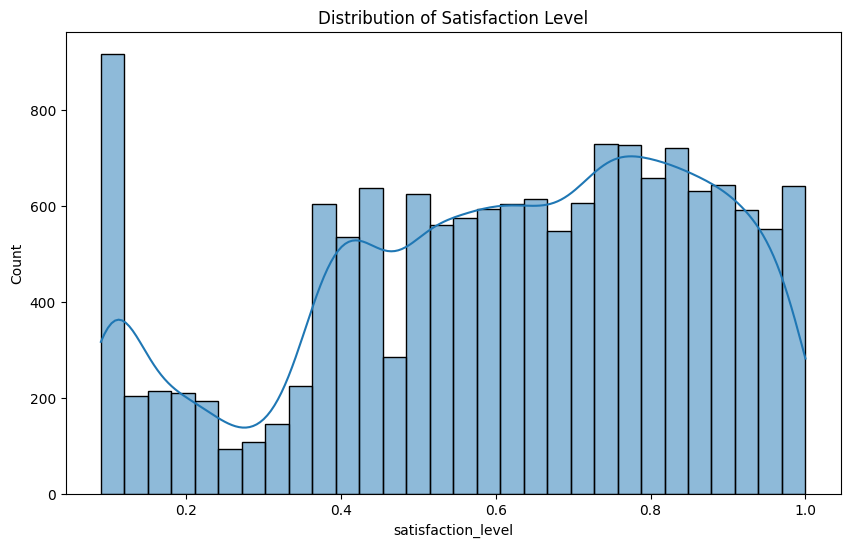

Mean Satisfaction Level for dataset: 0.6128335222348156


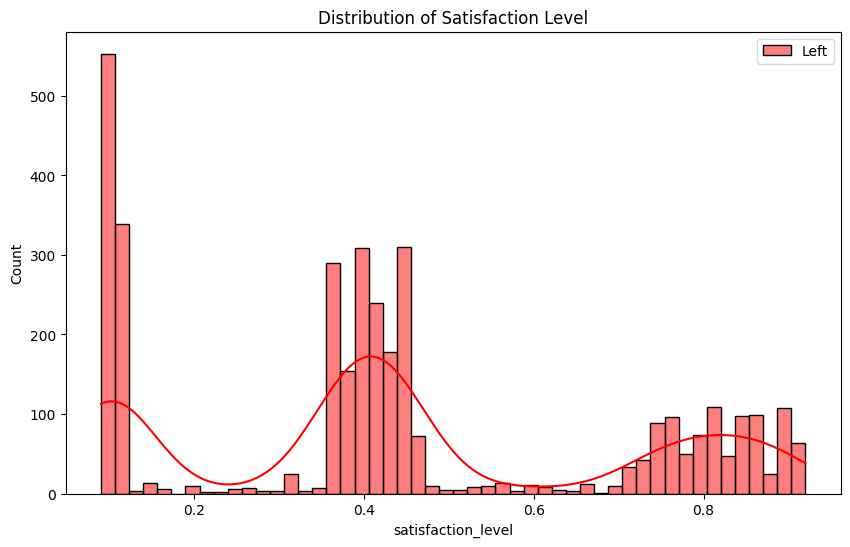

Mean Satisfaction Level for those who left: 0.4400980117614114


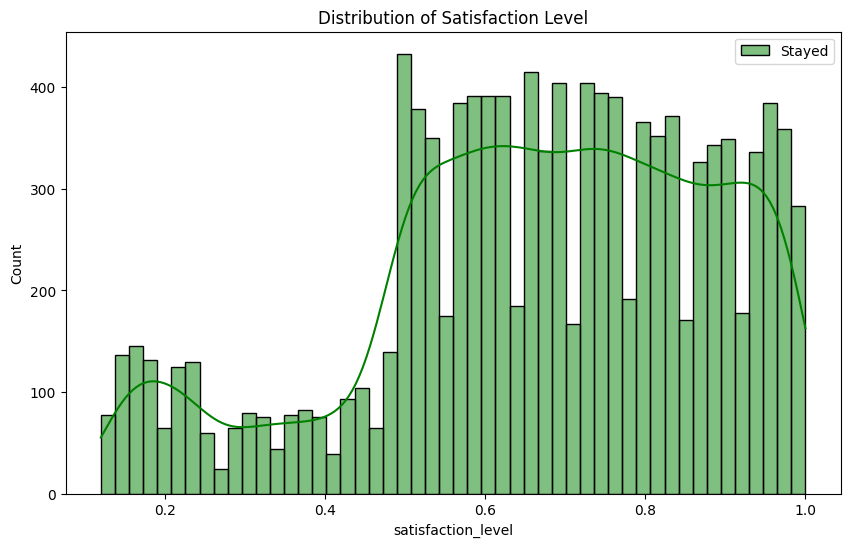

Total number of employees who left the company: 3571

Mean Satisfaction Level for those who stayed: 0.666809590479524

Total number of employees with satisfaction level less than .1: 195
Total number of employees with satisfaction level less than .1 who left: 195
Percentage of employees with satisfaction level less than .1 who left: 100.0 %
Percentage of employees with satisfaction level less than .1 who left compared to total number of employees who left: 5.46 %

Total number of employees with satisfaction level less than .15: 1045
Total number of employees with satisfaction level less than .15 who left: 905
Percentage of employees with satisfaction level less than .15 who left: 86.6 %
Percentage of employees with satisfaction level less than .15 who left compared to total number of employees who left: 25.34 %

Total number of employees with satisfaction level between .15 and .2: 433
Total number of employees with satisfaction level between .15 and .2 who left: 19
Percentage of employ

In [9]:
### Plot the distribution of the numerical columns
# plot satisfaction_level
plt.figure(figsize=(10,6))
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Distribution of Satisfaction Level')
plt.show()

# Print mean satisfaction level for dataset
print('Mean Satisfaction Level for dataset:',df['satisfaction_level'].mean())

# Plot satisfaction level for those who left 
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==1]['satisfaction_level'], kde=True, color='red', label='Left',bins=50)
#sns.histplot(df[df['left']==0]['satisfaction_level'], kde=True, color='green', label='Stayed')
plt.title('Distribution of Satisfaction Level')
plt.legend()
plt.show()

# print mean satisfaction level for those who left
print('Mean Satisfaction Level for those who left:',df[df['left']==1]['satisfaction_level'].mean())

# plot satisfaction_level for those who stayed
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==0]['satisfaction_level'], kde=True, color='green', label='Stayed',bins=50)
plt.title('Distribution of Satisfaction Level')
plt.legend()
plt.show()

# Total number of employees who left the company
print('Total number of employees who left the company:',df[df['left']==1].shape[0])
print()
# print mean satisfaction level for those who stayed
print('Mean Satisfaction Level for those who stayed:',df[df['left']==0]['satisfaction_level'].mean())
print()
#Total number of employees with satisfaction level less than .1
print('Total number of employees with satisfaction level less than .1:',df[df['satisfaction_level']<0.1].shape[0])
# Total number of employees with satisfaction level less than .1 who left
print('Total number of employees with satisfaction level less than .1 who left:',df[(df['satisfaction_level']<0.1) & (df['left']==1)].shape[0])

# Total percentage of employees with satisfaction level less than .1 who left
print('Percentage of employees with satisfaction level less than .1 who left:',round(df[(df['satisfaction_level']<0.1) & (df['left']==1)].shape[0]/df[df['satisfaction_level']<0.1].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level less than .1 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level less than .1 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']<0.1) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
print()

# Total number of employees with satisfaction level less than .15
print('Total number of employees with satisfaction level less than .15:',df[df['satisfaction_level']<0.15].shape[0])
# Total number of employees with satisfaction level less than .15 who left
print('Total number of employees with satisfaction level less than .15 who left:',df[(df['satisfaction_level']<0.15) & (df['left']==1)].shape[0])
#Total percentage of employees with satisfaction level less than .15 who left
print('Percentage of employees with satisfaction level less than .15 who left:',round(df[(df['satisfaction_level']<0.15) & (df['left']==1)].shape[0]/df[df['satisfaction_level']<0.15].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level less than .15 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level less than .15 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']<0.15) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
print()

#Total number of employees with satisfaction level between .15 and .2
print('Total number of employees with satisfaction level between .15 and .2:',df[(df['satisfaction_level']>=0.15) & (df['satisfaction_level']<=0.2)].shape[0])
# Total number of employees with satisfaction level between .15 and .2 who left
print('Total number of employees with satisfaction level between .15 and .2 who left:',df[(df['satisfaction_level']>=0.15) & (df['satisfaction_level']<=0.2) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level between .15 and .2 who left
print('Percentage of employees with satisfaction level between .15 and .2 who left:',round(df[(df['satisfaction_level']>=0.15) & (df['satisfaction_level']<=0.2) & (df['left']==1)].shape[0]/df[(df['satisfaction_level']>=0.15) & (df['satisfaction_level']<=0.2)].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level between .15 and .2 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level between .15 and .2 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']>=0.15) & (df['satisfaction_level']<=0.2) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
print()

# Total Number of employees with satisfactin level less than .2
print('Total number of employees with satisfaction level less than .2:',df[df['satisfaction_level']<0.2].shape[0])
# Total Number of employees with satisfaction level less than .2 who left
print('Total number of employees with satisfaction level less than .2 who left:',df[(df['satisfaction_level']<0.2) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level less than .2 who left
print('Percentage of employees with satisfaction level less than .2 who left:',round(df[(df['satisfaction_level']<0.2) & (df['left']==1)].shape[0]/df[df['satisfaction_level']<0.2].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level less than .2 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level less than .2 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']<0.2) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
print()

# Total Number of employees with satisfaction level less than .375
print('Total number of employees with satisfaction level less than .375:',df[df['satisfaction_level']<0.375].shape[0])
# Total Number of employees with satisfaction level less than .375 who left
print('Total number of employees with satisfaction level less than .375 who left:',df[(df['satisfaction_level']<0.375) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level less than .375 who left
print('Percentage of employees with satisfaction level less than .375 who left:',round(df[(df['satisfaction_level']<0.375) & (df['left']==1)].shape[0]/df[df['satisfaction_level']<0.375].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level less than .375 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level less than .375 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']<0.375) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')

print()

# Total Number of employees with satisfaction level beween .2 and .375
print('Total number of employees with satisfaction level between .2 and .375:',df[(df['satisfaction_level']>=0.2) & (df['satisfaction_level']<=0.375)].shape[0])
# Total Number of employees with satisfaction level between .2 and .375 who left
print('Total number of employees with satisfaction level between .2 and .375 who left:',df[(df['satisfaction_level']>=0.2) & (df['satisfaction_level']<=0.375) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level between .2 and .375 who left
print('Percentage of employees with satisfaction level between .2 and .375 who left:',round(df[(df['satisfaction_level']>=0.2) & (df['satisfaction_level']<=0.375) & (df['left']==1)].shape[0]/df[(df['satisfaction_level']>=0.2) & (df['satisfaction_level']<=0.375)].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level between .2 and .375 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level between .2 and .375 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']>=0.2) & (df['satisfaction_level']<=0.375) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')

print()


# Total  Number of employees with satisfaction level between .375 and .475
print('Total number of employees with satisfaction level between .375 and .475:',df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475)].shape[0])
# Total Number of employees with satisfaction level between .375 and .475 who left
print('Total number of employees with satisfaction level between .375 and .475 who left:',df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level between .375 and .475 who left
print('Percentage of employees with satisfaction level between .375 and .475 who left:',round(df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475) & (df['left']==1)].shape[0]/df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475)].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level between .375 and .475 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level between .375 and .475 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')

print()


# Total Number of employees with satisfaction level less than .5
print('Total number of employees with satisfaction level less than .5:',df[df['satisfaction_level']<0.5].shape[0])
# Total Number of employees with satisfaction leel less than .5 who left
print('Total number of employees with satisfaction level less than .5 who left:',df[(df['satisfaction_level']<0.5) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level less than .5 who left
print('Percentage of employees with satisfaction level less than .5 who left:',round(df[(df['satisfaction_level']<0.5) & (df['left']==1)].shape[0]/df[df['satisfaction_level']<0.5].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level less than .5 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level less than .5 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']<0.5) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')

print()

# Total Number of employees with satisfaction level between .475 and .5
print('Total number of employees with satisfaction level between .475 and .5:',df[(df['satisfaction_level']>=0.475) & (df['satisfaction_level']<=0.5)].shape[0])
# Total Number of employees with satisfaction level between .475 and .5 who left
print('Total number of employees with satisfaction level between .475 and .5 who left:',df[(df['satisfaction_level']>=0.475) & (df['satisfaction_level']<=0.5) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level between .475 and .5 who left
print('Percentage of employees with satisfaction level between .475 and .5 who left:',round(df[(df['satisfaction_level']>=0.475) & (df['satisfaction_level']<=0.5) & (df['left']==1)].shape[0]/df[(df['satisfaction_level']>=0.475) & (df['satisfaction_level']<=0.5)].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level between .475 and .5 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level between .475 and .5 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']>=0.475) & (df['satisfaction_level']<=0.5) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')

print()

# Total number of employees with satisfaction level between .5 and .7 
print('Total number of employees with satisfaction level between .5 and .7:',df[(df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.7)].shape[0])
# Total number of employees with satisfaction level between .5 and .7 who left
print('Total number of employees with satisfaction level between .5 and .7 who left:',df[(df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.7) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level between .5 and .7 who left
print('Percentage of employees with satisfaction level between .5 and .7 who left:',round(df[(df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.7) & (df['left']==1)].shape[0]/df[(df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.7)].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level between .5 and .7 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level between .5 and .7 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.7) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')

print()

# Total Number of employees with satisfaction level between .7 and 1
print('Total number of employees with satisfaction level between .7 and 1:',df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1)].shape[0])
# Total Number of employees with satisfaction level between .7 and 1 who left
print('Total number of employees with satisfaction level between .7 and 1 who left:',df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1) & (df['left']==1)].shape[0])
# Total percentage of employees with satisfaction level between .7 and 1 who left
print('Percentage of employees with satisfaction level between .7 and 1 who left:',round(df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1) & (df['left']==1)].shape[0]/df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1)].shape[0]*100,2),'%')
# Percentage of employees with satisfaction level between .7 and 1 who left compared to total number of employees who left
print('Percentage of employees with satisfaction level between .7 and 1 who left compared to total number of employees who left:',round(df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1) & (df['left']==1)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
print()



### From the distribution of satisfaction level, we see an interesting pattern
### It seems that there are 3 intervals that contain the majority of those who left, about 87% of the total people who left
### These intervals are:
### Satisfaction level less than .15 (25.34% of overall employees who left)
### Satisfacton level between .375 and .475 (35.37% of overall employees who left)
### Satisfaction level greater than .7 (26.41% of overall employees who left)

### As we can see, we have a low satisfaction satisfaction level range among the employees who left, perhaps this is expected, since they are very unsatisfied in their jobs
### However, there is a large number of people in a range which we could call a 'moderate satisfaction' level which seems to hold the largest group of employees leaving
### Moreover, we can also see that even employees with what we could all 'high satisfaction' levels, above .7 (which is above the mean) are also leaving at slightly a higher rate than those in the 'low satisfaction' range.

### So, clearly, satisfaction level is only part of the reason why people are leaving. 


## For each of the satisfaction levels, we need to find out what is contributing to the employees leaving

### We will first divide the data into data frames that group employees by satisfaction level

In [10]:
# Define the satisfaction key satisfaction level ranges for the data
satisfaction_low = df[df['satisfaction_level']<.15]
satisfaction_med_low = df[(df['satisfaction_level']>=0.15) & (df['satisfaction_level']<0.375)]
satisfaction_med = df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<0.475)]
satisfaction_med_high = df[(df['satisfaction_level']>=0.475) & (df['satisfaction_level']<0.7)]
satisfaction_high = df[df['satisfaction_level']>=0.7]

# Create List of the satisfaction levels dataframes
satisfaction_levels = [satisfaction_low, satisfaction_med_low, satisfaction_med, satisfaction_med_high, satisfaction_high]

### We will next create a function that takes in a satisfaction level and returns the statistics for that satisfaction level


In [11]:
# Function to print out statistics for each satisfaction level range. The satisfaction_level dataframe is passed to the function
def satisfaction_stats(satisfaction_level):
    print('Total number of employees at this satisfaction level:',satisfaction_level.shape[0])
    print('Total number of employees who left at this satisfaction level:',satisfaction_level[satisfaction_level['left']==1].shape[0])
    print('Percentage of employees who left at satisfaction level compared to all employees at this satisfaction level:',round(satisfaction_level[satisfaction_level['left']==1].shape[0]/satisfaction_level.shape[0]*100,2),'%')
    print('Percentage of employees who left at this satisfaction level compared to overall total number of employees who left:',round(satisfaction_level[satisfaction_level['left']==1].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
    print()
    
    # Calculate summary statistics for the passed satisfaction_level dataframe

    print('Description for satisfaction level between: ',satisfaction_level['satisfaction_level'].min(),' and ',satisfaction_level['satisfaction_level'].max())
    level_summary = satisfaction_level.describe()
    print(level_summary)
    
    # For the categorical columns, department, salary, promotion_last_5years, and Work_accident, calculate the following statistics:
    # Count of employees in each department at this satisfaction level
    print('Count of employees in each department:')
    print(satisfaction_level['department'].value_counts())
    # Count of employees in each departnment who left at this satisfaction level and the percentage of employees who left in each department
    print('Count of employees in each department who left:')
    print(satisfaction_level[satisfaction_level['left']==1]['department'].value_counts())
    print('Percentage of employees in each department who left:')
    print(satisfaction_level[satisfaction_level['left']==1]['department'].value_counts()/satisfaction_level['department'].value_counts()*100)
    
    print()
    # Count of employees in each salary range
    print('Count of employees in each salary range:')
    print(satisfaction_level['salary'].value_counts())
    print()
    # Count of employees in each salary range who left at this satisfaction level
    print('Count of employees in each salary range who left:')
    print(satisfaction_level[satisfaction_level['left']==1]['salary'].value_counts())
    print()
    # Percentage of employees in each salary range who left at this satisfaction level
    print('Percentage of employees in each salary range who left:')
    print(satisfaction_level[satisfaction_level['left']==1]['salary'].value_counts()/satisfaction_level['salary'].value_counts()*100)
    print()
    # Count of employees who received a promotion in the last 5 years
    print('Count of employees who received a promotion in the last 5 years:')
    print(satisfaction_level['promotion_last_5years'].value_counts())
    print()
    # Count of employees who received a promption in the last 5 years and left
    print('Count of employees who received a promotion in the last 5 years and left:')
    print(satisfaction_level[(satisfaction_level['promotion_last_5years']==1) & (satisfaction_level['left']==1)].shape[0])
    print()
    # Percentage of employees who received a promotion in the last 5 years and left
    print('Percentage of employees who received a promotion in the last 5 years and left:')
    print(satisfaction_level[(satisfaction_level['promotion_last_5years']==1) & (satisfaction_level['left']==1)].shape[0]/satisfaction_level[satisfaction_level['promotion_last_5years']==1].shape[0]*100)
    print()
     # Proportion of employees who left the company within each promotion_last_5years range
    print('Proportion of employees who left the company within each promotion_last_5years range:')
    print(satisfaction_level[satisfaction_level['left']==1]['promotion_last_5years'].value_counts()/satisfaction_level['promotion_last_5years'].value_counts()*100)
    print()
    # Count of employees who had a work accident
    print('Count of employees who had a work accident:')
    print(satisfaction_level['Work_accident'].value_counts())
    print()
    # Count of employees who had a work accident and left
    print('Count of employees who had a work accident and left:')
    print(satisfaction_level[(satisfaction_level['Work_accident']==1) & (satisfaction_level['left']==1)].shape[0])
    print()
    # Percentage of employees who had a work accident and left
    print('Percentage of employees who had a work accident and left:')
    print(satisfaction_level[(satisfaction_level['Work_accident']==1) & (satisfaction_level['left']==1)].shape[0]/satisfaction_level[satisfaction_level['Work_accident']==1].shape[0]*100)
    print()
    # Proportion of employees who left the company within each Work_accident range
    print('Proportion of employees who left the company within each Work_accident range:')
    print(satisfaction_level[satisfaction_level['left']==1]['Work_accident'].value_counts()/satisfaction_level['Work_accident'].value_counts()*100)
    print()
    
    

### We will now pass the satisfaction levels dataframes starting with satisfaction_low and analyze what might be contributing to employees leaving for each of those levels of satisfaction

In [12]:
# Pass satisfaction_low dataframe to satisfaction_stats function
satisfaction_stats(satisfaction_low)

Total number of employees at this satisfaction level: 1045
Total number of employees who left at this satisfaction level: 905
Percentage of employees who left at satisfaction level compared to all employees at this satisfaction level: 86.6 %
Percentage of employees who left at this satisfaction level compared to overall total number of employees who left: 25.34 %

Description for satisfaction level between:  0.09  and  0.14
       satisfaction_level  last_evaluation  number_project  \
count         1045.000000      1045.000000     1045.000000   
mean             0.106258         0.845799        5.935885   
std              0.013472         0.104147        0.937053   
min              0.090000         0.380000        2.000000   
25%              0.100000         0.800000        6.000000   
50%              0.100000         0.860000        6.000000   
75%              0.110000         0.920000        6.000000   
max              0.140000         1.000000        7.000000   

       averag

# Analysis for Low Level Satisfaction employees

## 1. Most employees at this satisfaction level <.15 left the company, 86.6% is a huge percentage
## 2. Last Evaluation for all these employees was actually pretty high, with a mean of .846, compared to the entire company's mean of .716. So this might be telling us that these people were performing well as far as management was concerned, that's why their last evaluation came in above the mean for the entire company
## 3. The number of projects that this group of low satisfaction level employees were assigned was also above the mean for the whole company, as the mean for this group was  5.9 projects compared to a mean of 3.8 for the entire company. This starts to paint us a picture that this group of employees was being overworked
## 4. We corroborate the overworked hypothesis by noticing that the average monthly hours for this low satisfaction group was of a whopping 265.9 hours compared to a mean of 201 for the entire company
## 5. Moreover, this group of low satisfaction employees seemed to be mid-level experienced employees as the mean of time spent in the company came in at 4.17 years, which is 1/2 a year greater than the mean for the entire company employee pool which was 3.5 years
## 6. Most employees in this satisfaction level did not receive a promotion in the past 5 year, but if we dig a little deeper, we see that even for the small number of employees who had received a promotion, that promotion meant nothing to them and ALL of them left the company
## 7. We notice that when we get a count of all employees in this satisfaction level by department, and then do a percentage of the ones who left, we get that for ALL departments, over 80% of the employees left, management having the lowest percentage at 80% of their employees left at this satisfaction level and hr having the highest percentage at 90.7% of their people leaving, so for ALL departments at the very least 8 in 10 of their employees left, clearly the reasons are not specific to any department but across the entire company
## 8. Next we notice that salary does not necessarily prevent these overworked people with low satisfaction level to leave, both low and mid salaried employees at this level had an attrition level of over 85% and although high pay individuals were only 15 in this group, almost half of them left, so salary does not seem to compensate for being overworked with a hight evaluation for this group
## 9. Most people were not promoted in the past 5 years, but at this satisfaction level even the tiny number of 3 individuals who had been promoted left, so at this level promotion might not matter either
## 10. Having had an accident also does not seem to have much correlation for this satisfaction level, 88% of non-accident employees and 66% of accident employees left

## Analysis of Factors that could be contributig to turnover per statistics above:

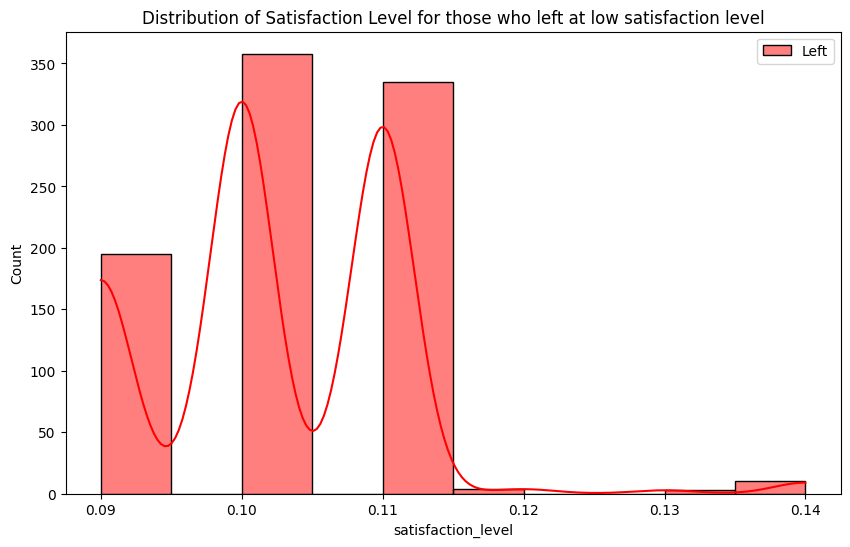

In [13]:
# Distribution of satisfaction level for those who left at low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_low[satisfaction_low['left']==1]['satisfaction_level'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Satisfaction Level for those who left at low satisfaction level')
plt.legend()
plt.show()

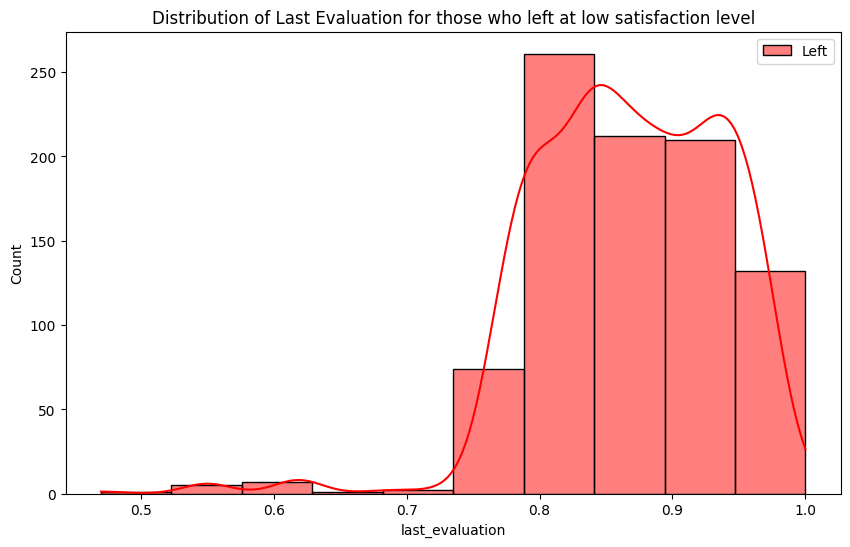

In [14]:
# Distribution of last evaluation for those who left at low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_low[satisfaction_low['left']==1]['last_evaluation'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Last Evaluation for those who left at low satisfaction level')
plt.legend()
plt.show()

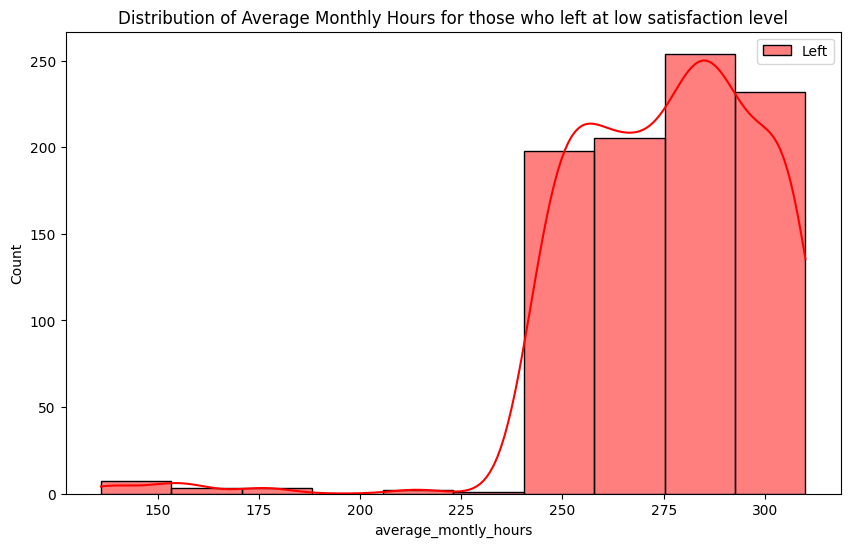

In [15]:
# Distribution of average monthly hours for those who left at low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_low[satisfaction_low['left']==1]['average_montly_hours'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Average Monthly Hours for those who left at low satisfaction level')
plt.legend()
plt.show()

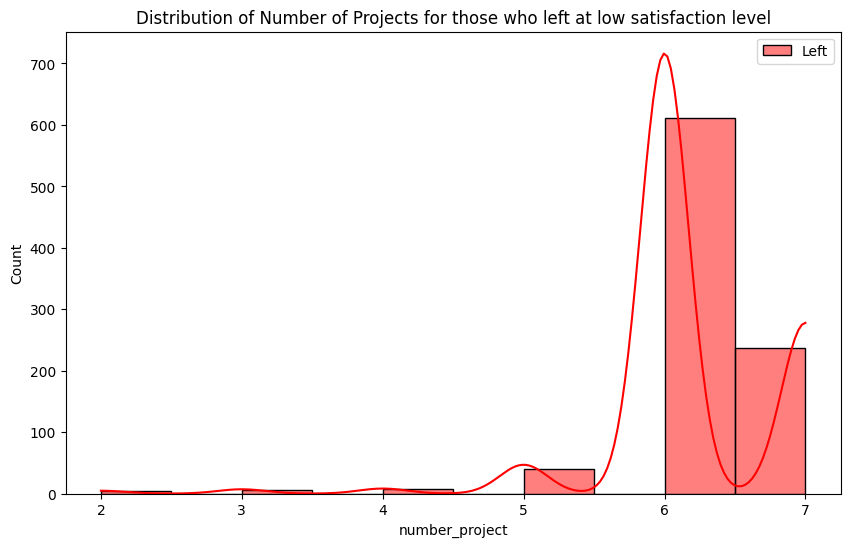

In [16]:
# Distribution of number of projects for those who left at low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_low[satisfaction_low['left']==1]['number_project'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Number of Projects for those who left at low satisfaction level')
plt.legend()
plt.show()

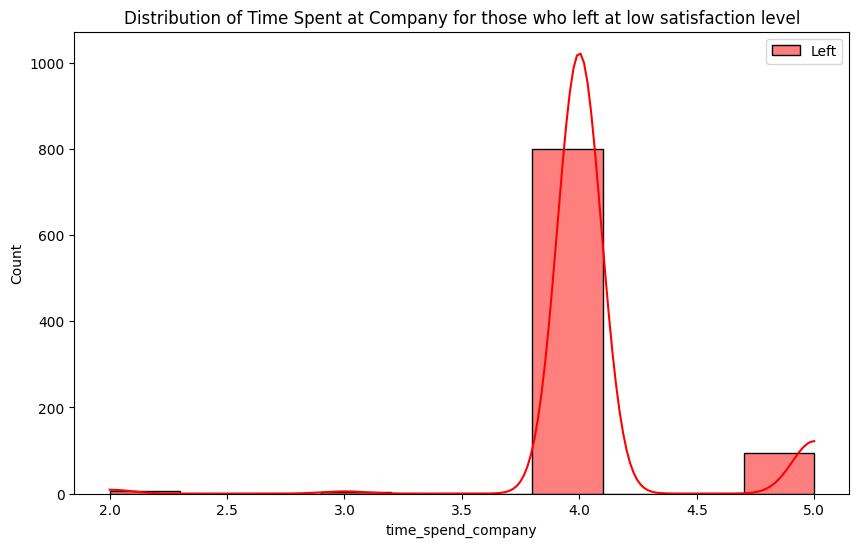

In [17]:
#Distribution of time spent at the company for those who left at low satisfaction level
plt.figure(figsize=(10,6))
sns.histplot(satisfaction_low[satisfaction_low['left']==1]['time_spend_company'], kde=True, color='red', label='Left',bins=10)
plt.title('Distribution of Time Spent at Company for those who left at low satisfaction level')
plt.legend()
plt.show()


In [18]:
# Ploytly boxplot of salaries for those who left at low satisfaction level with title
import plotly.express as px
fig = px.box(satisfaction_low[satisfaction_low['left']==1], x='salary', y='satisfaction_level', points='all', title='Boxplot of Salaries for those who left at low satisfaction level')
fig.show()

In [19]:
# Pass satisfaction_med_low dataframe to satisfaction_stats function
satisfaction_stats(satisfaction_med_low)

Total number of employees at this satisfaction level: 1506
Total number of employees who left at this satisfaction level: 367
Percentage of employees who left at satisfaction level compared to all employees at this satisfaction level: 24.37 %
Percentage of employees who left at this satisfaction level compared to overall total number of employees who left: 10.28 %

Description for satisfaction level between:  0.15  and  0.37
       satisfaction_level  last_evaluation  number_project  \
count         1506.000000      1506.000000     1506.000000   
mean             0.268805         0.654110        3.830677   
std              0.077617         0.172903        1.468116   
min              0.150000         0.360000        2.000000   
25%              0.200000         0.510000        2.000000   
50%              0.260000         0.620000        4.000000   
75%              0.360000         0.800000        5.000000   
max              0.370000         1.000000        7.000000   

       avera

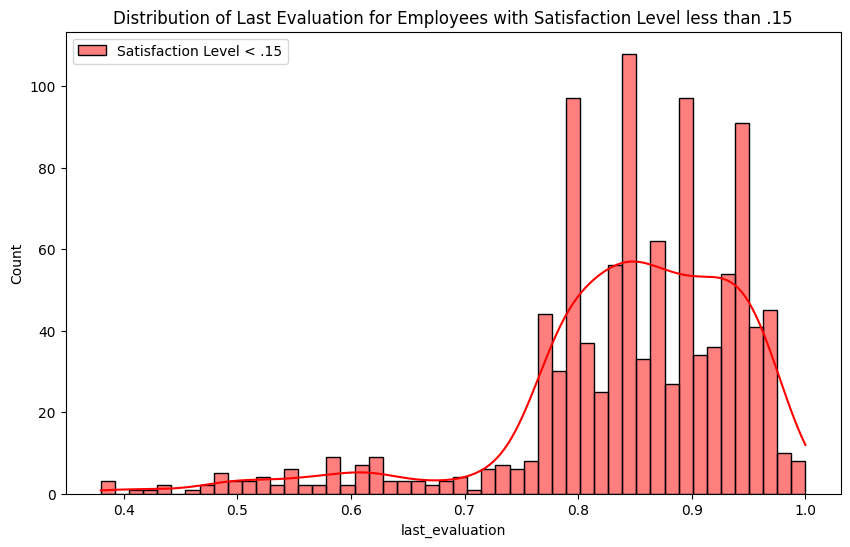

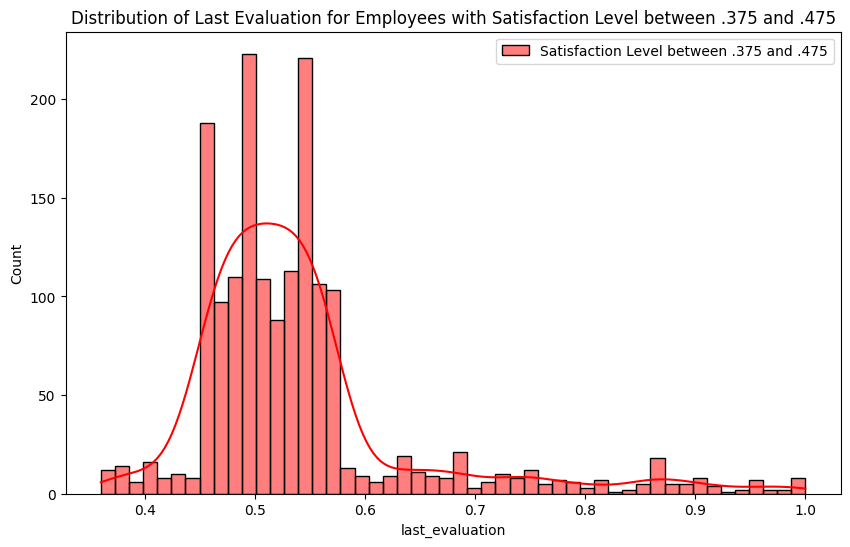

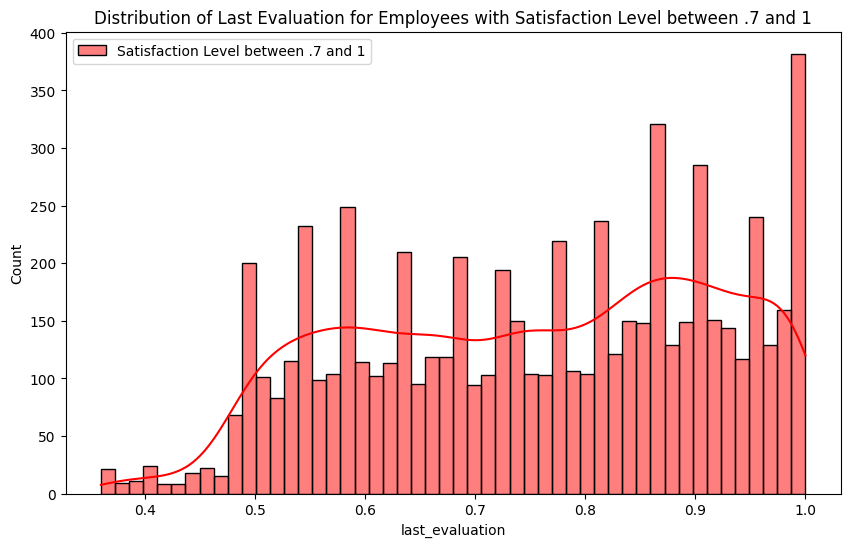

/var/folders/fs/0vv7jr217sn00vstpyw91xyr0000gn/T/ipykernel_20231/3116527796.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='salary', data=df[df['satisfaction_level']<0.15], palette='viridis')


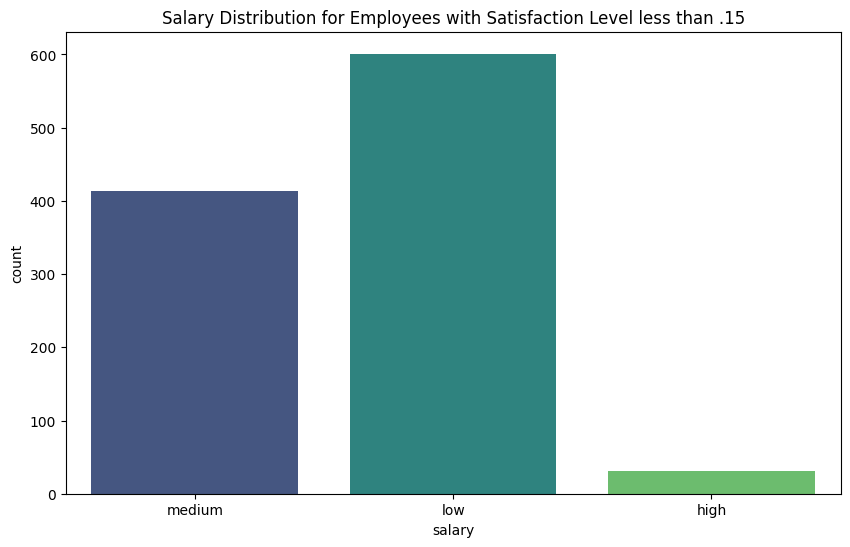

/var/folders/fs/0vv7jr217sn00vstpyw91xyr0000gn/T/ipykernel_20231/3116527796.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='salary', data=df[(df['satisfaction_level']<0.15) & (df['left']==1)], palette='viridis')


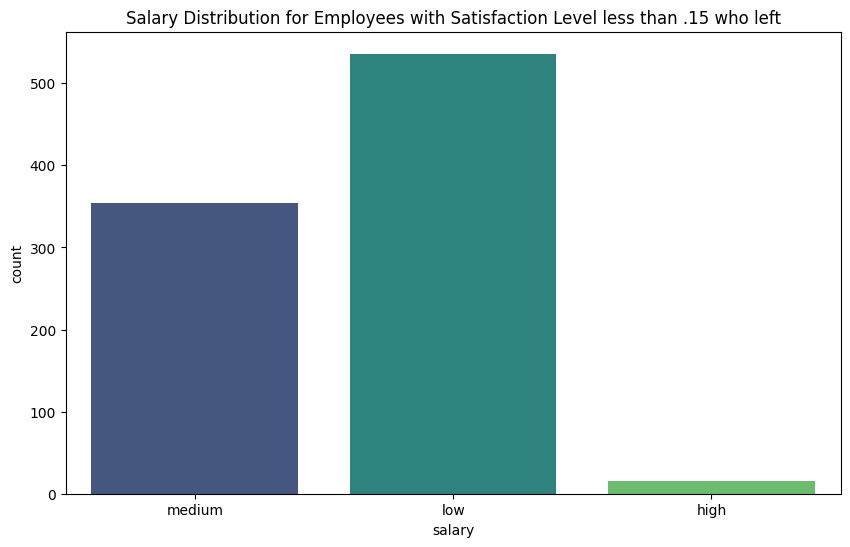

/var/folders/fs/0vv7jr217sn00vstpyw91xyr0000gn/T/ipykernel_20231/3116527796.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='salary', data=df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475)], palette='viridis')


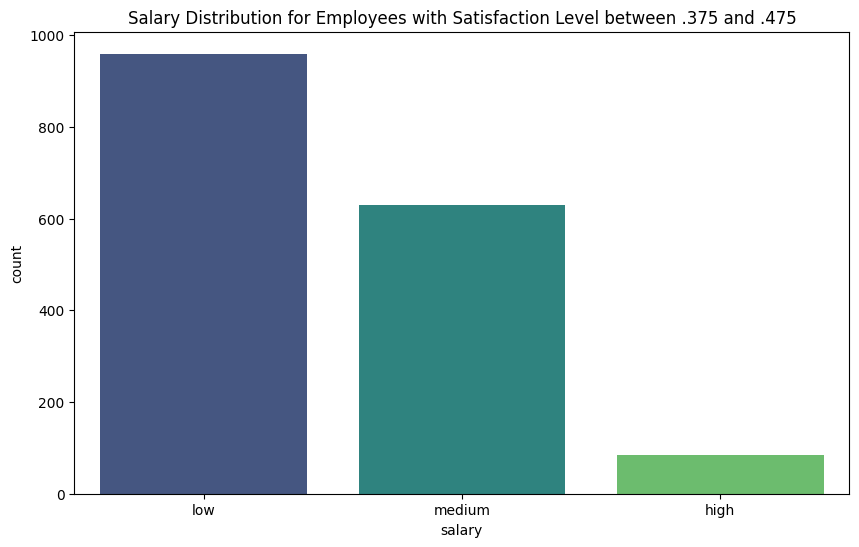

/var/folders/fs/0vv7jr217sn00vstpyw91xyr0000gn/T/ipykernel_20231/3116527796.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='salary', data=df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1)], palette='viridis')


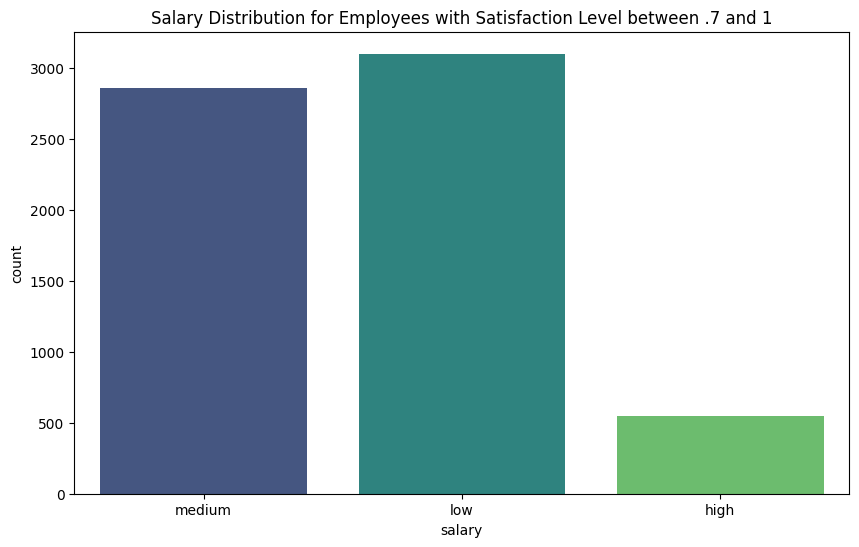

Total number of employees who left - by shape 3571 .... 23.81 %
Total number of employees who left - by sum 3571
Total number of employees who stayed: 11428 .... 76.19 %
Number of employees who left with low salary: 2172 .... 60.82 %
Number of employees who left with low salary and satisfaction level less than .5: 1552 ... 71.45 %
Number of employees who left with satisfaction level less than .5: 2547 .... 71.32 %


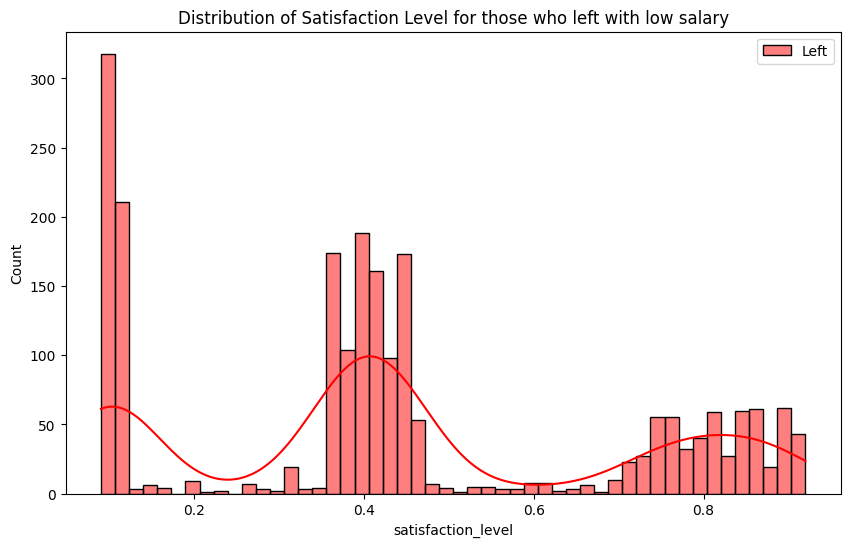

Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6: 963


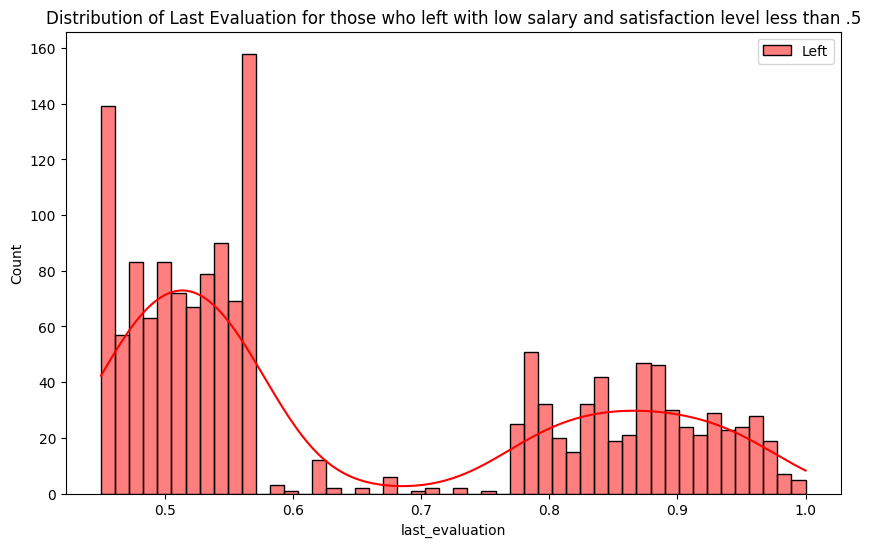

Average Monthly Hours for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6: 146.66251298026998


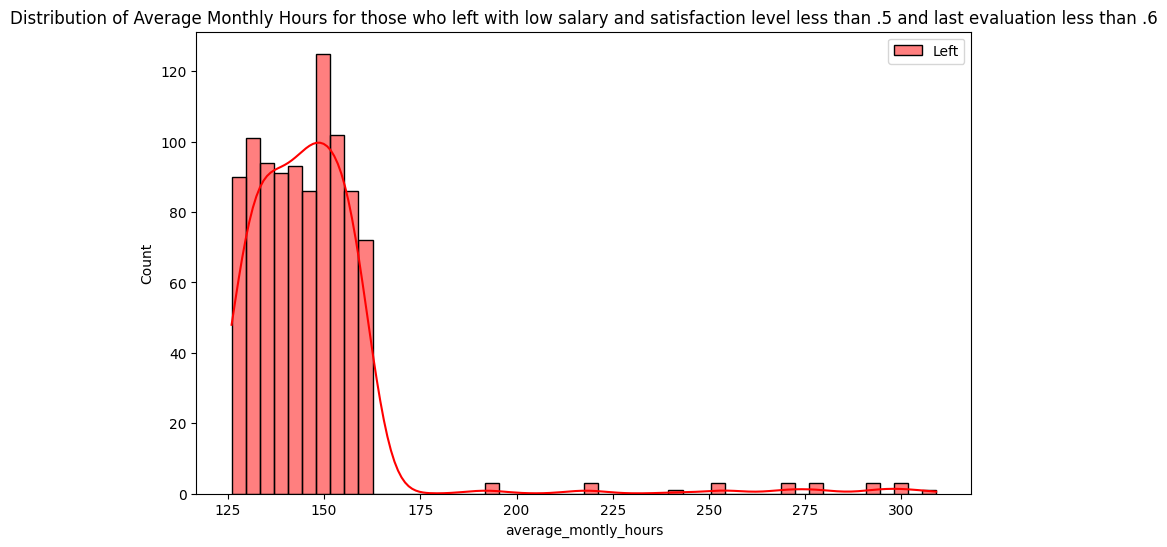

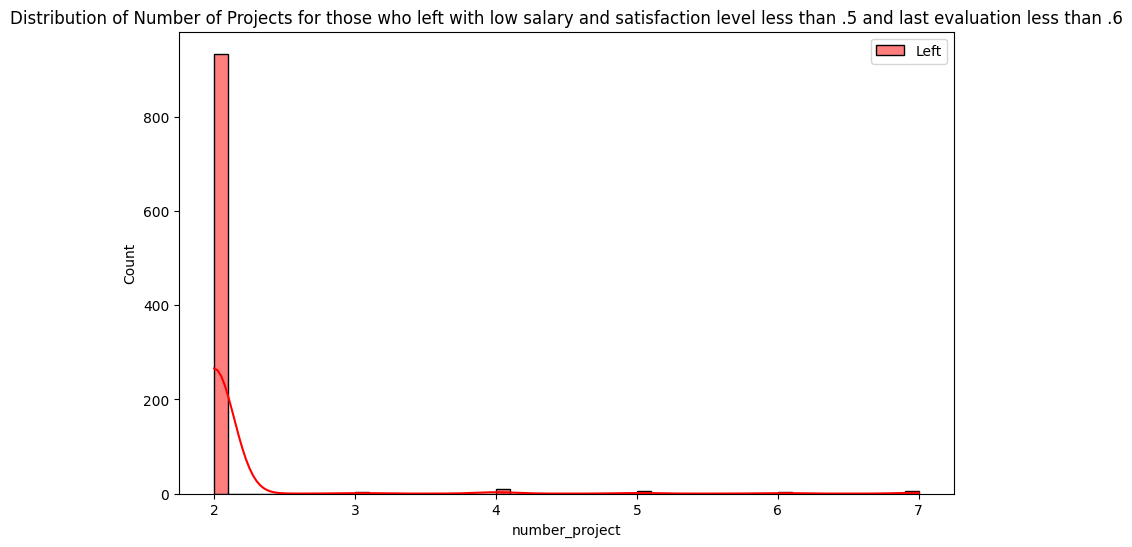

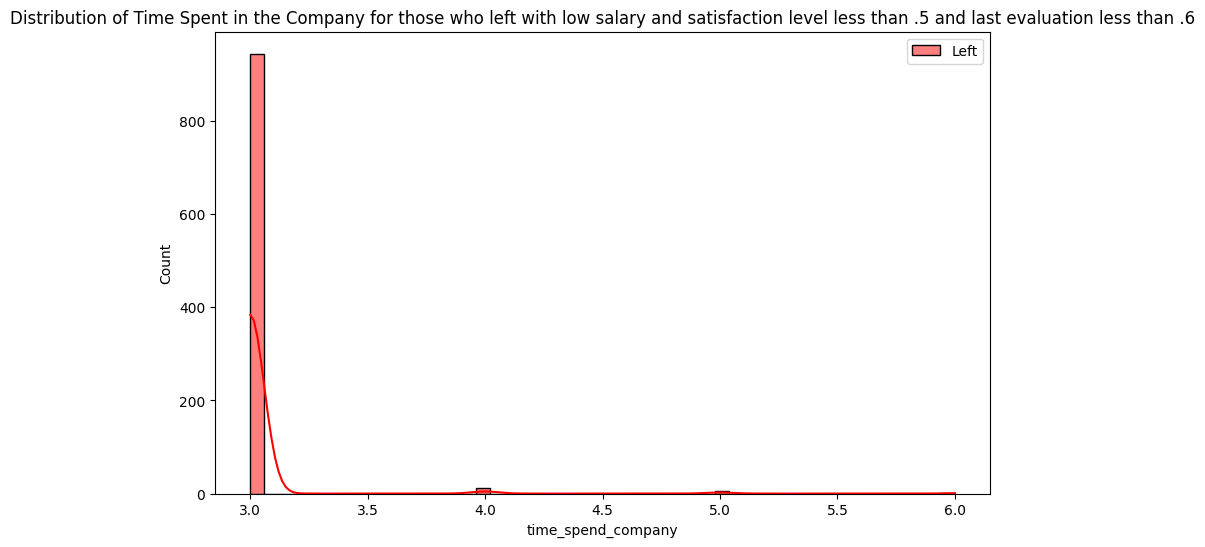

Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a work accident: 44
Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a promotion in the last 5 years: 8
Number of employees who stayed with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a promotion in the last 5 years: 0
Number of employees who stayed with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who han no promotion in the last 5 years: 58
Total number of employees who left after being promoted: 19
Total number of employees who stayed after being promoted: 300
Total number of employees who were promoted: 319
Number of employees who were promoted with satisfaction level less th

In [23]:

# Plot the evaluation distribution for employees with a satisfaction level less than .15
plt.figure(figsize=(10,6))
sns.histplot(df[df['satisfaction_level']<0.15]['last_evaluation'], kde=True, color='red', label='Satisfaction Level < .15',bins=50)
plt.title('Distribution of Last Evaluation for Employees with Satisfaction Level less than .15')
plt.legend()
plt.show()

# Plot the evaluation distribution for employees with a satisfaction level between .375 and .475
plt.figure(figsize=(10,6))
sns.histplot(df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475)]['last_evaluation'], kde=True, color='red', label='Satisfaction Level between .375 and .475',bins=50)
plt.title('Distribution of Last Evaluation for Employees with Satisfaction Level between .375 and .475')
plt.legend()
plt.show()

# Plot the evaluation distribution for employees with a satisfaction level between .7 and 1
plt.figure(figsize=(10,6))
sns.histplot(df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1)]['last_evaluation'], kde=True, color='red', label='Satisfaction Level between .7 and 1',bins=50)
plt.title('Distribution of Last Evaluation for Employees with Satisfaction Level between .7 and 1')
plt.legend()
plt.show()


# Plot salary distribution for employees with a satisfaction level less than .15
plt.figure(figsize=(10,6))
sns.countplot(x='salary', data=df[df['satisfaction_level']<0.15], palette='viridis')
plt.title('Salary Distribution for Employees with Satisfaction Level less than .15')
plt.show()

# Plot salary distribution for employees with a satisfaction level less than .15 who left
plt.figure(figsize=(10,6))
sns.countplot(x='salary', data=df[(df['satisfaction_level']<0.15) & (df['left']==1)], palette='viridis')
plt.title('Salary Distribution for Employees with Satisfaction Level less than .15 who left')
plt.show()


# Plot salary distribution for employees with a satisfaction level between .375 and .475
plt.figure(figsize=(10,6))
sns.countplot(x='salary', data=df[(df['satisfaction_level']>=0.375) & (df['satisfaction_level']<=0.475)], palette='viridis')
plt.title('Salary Distribution for Employees with Satisfaction Level between .375 and .475')
plt.show()

# Plot salary distribution for employees with a satisfaction level between .7 and 1
plt.figure(figsize=(10,6))
sns.countplot(x='salary', data=df[(df['satisfaction_level']>=0.7) & (df['satisfaction_level']<=1)], palette='viridis')
plt.title('Salary Distribution for Employees with Satisfaction Level between .7 and 1')
plt.show()



# Total Number of employees who left
print('Total number of employees who left - by shape',df[df['left']==1].shape[0],'....',round(df[df['left']==1].shape[0]/df.shape[0]*100,2),'%')
# Total number of employees who left by summing the left column
print('Total number of employees who left - by sum',df['left'].sum())
# Total Number of employees who stayed
print('Total number of employees who stayed:',df[df['left']==0].shape[0],'....',round(df[df['left']==0].shape[0]/df.shape[0]*100,2),'%')
# Number of employees who left that had a low salary
print('Number of employees who left with low salary:',df[(df['left']==1) & (df['salary']=='low')].shape[0],'....',round(df[(df['left']==1) & (df['salary']=='low')].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
# Number of employees who left that had a los salary and a satisfaction level of less than .5
print('Number of employees who left with low salary and satisfaction level less than .5:',df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5)].shape[0],'...',round(df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5)].shape[0]/df[(df['left']==1) & (df['salary']=='low')].shape[0]*100,2),'%')
# Number of employees who left with a satisfacxtion level of less than .5
print('Number of employees who left with satisfaction level less than .5:',df[(df['left']==1) & (df['satisfaction_level']<0.5)].shape[0],'....',round(df[(df['left']==1) & (df['satisfaction_level']<0.5)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
# Satisfaction level distribution for those who left with low salary
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['salary']=='low')]['satisfaction_level'], kde=True, color='red', label='Left',bins=50)
plt.title('Distribution of Satisfaction Level for those who left with low salary')
plt.legend()
plt.show()
# Number of employees who left and had low salary with satisfaction level less than .5 and last evaluation less than .6
print('Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6:',
      df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6)].shape[0])

# Distribution of last evaluation for those who left with low salary and satisfaction level less than .5
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5)]['last_evaluation'], kde=True, color='red', label='Left',bins=50)
plt.title('Distribution of Last Evaluation for those who left with low salary and satisfaction level less than .5')
plt.legend()
plt.show()

# Print average monthly hours for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6
print('Average Monthly Hours for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6:',
      df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6)]['average_montly_hours'].mean())

# Plot distribution of monthly hours for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6)]['average_montly_hours'], kde=True, color='red', label='Left',bins=50)
plt.title('Distribution of Average Monthly Hours for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6')
plt.legend()
plt.show()

# Plot distribution of number of projects for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6)]['number_project'], kde=True, color='red', label='Left',bins=50)
plt.title('Distribution of Number of Projects for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6')
plt.legend()
plt.show()

# Plot distribution of time spent in the company for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6)]['time_spend_company'], kde=True, color='red', label='Left',bins=50)
plt.title('Distribution of Time Spent in the Company for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6')
plt.legend()
plt.show()

# Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a work accident
print('Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a work accident:',
      df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6) & (df['number_project']<3) & (df['Work_accident']==1)].shape[0])

# Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a promotion in the last 5 years
print('Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a promotion in the last 5 years:',
      df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6) & (df['number_project']<3) & (df['promotion_last_5years']==1)].shape[0])
print ('Number of employees who stayed with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a promotion in the last 5 years:',
       df[(df['left']==0) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6) & (df['number_project']<3) & (df['promotion_last_5years']==1)].shape[0])
print('Number of employees who stayed with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who han no promotion in the last 5 years:',
      df[(df['left']==0) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6) & (df['number_project']<3) & (df['promotion_last_5years']==0)].shape[0])
# Total number of promoted employees who left
print('Total number of employees who left after being promoted:',df[(df['left']==1) & (df['promotion_last_5years']==1)].shape[0])
# Total number of promoted employees who stayed
print('Total number of employees who stayed after being promoted:',df[(df['left']==0) & (df['promotion_last_5years']==1)].shape[0])
# Total number of promoted employees
print('Total number of employees who were promoted:',df[df['promotion_last_5years']==1].shape[0])
# Number of employees who were promoted that had a satisfaction level of less than .5
print('Number of employees who were promoted with satisfaction level less than .5:',df[(df['promotion_last_5years']==1) & (df['satisfaction_level']<0.5)].shape[0])
# Number of employees who were promoted that had a last evaluation of less than .6
print('Number of employees who were promoted with last evaluation less than .6:',df[(df['promotion_last_5years']==1) & (df['last_evaluation']<0.6)].shape[0])
# Number of employees who were promoted that had a satisfaction level of less than .5 and a last evaluation of less than .6
print('Number of employees who were promoted with satisfaction level less than .5 and last evaluation less than .6:',df[(df['promotion_last_5years']==1) & (df['satisfaction_level']<0.5) & (df['last_evaluation']<0.6)].shape[0])
# Number of employees who were promoted that had a satisfaction level of less than .5 and a last evaluation of less than .6 and a low salary
print('Number of employees who were promoted with satisfaction level less than .5 and last evaluation less than .6 and low salary:',df[(df['promotion_last_5years']==1) & (df['satisfaction_level']<0.5) & (df['last_evaluation']<0.6) & (df['salary']=='low')].shape[0])
# Number of employees who were promoted with satisfaction level less than .5 and last evaluation less than .6 and low salary who left
print('Number of employees who were promoted with satisfaction level less than .5 and last evaluation less than .6 and low salary who left:',df[(df['promotion_last_5years']==1) & (df['satisfaction_level']<0.5) & (df['last_evaluation']<0.6) & (df['salary']=='low') & (df['left']==1)].shape[0])



print()




# Number of employees who left that had a medium salary
print('Number of employees who left with medium salary:',df[(df['left']==1) & (df['salary']=='medium')].shape[0],'....',round(df[(df['left']==1) & (df['salary']=='medium')].shape[0]/df[df['left']==1].shape[0]*100,2),'%)')
# Number of employees who left that had a high salary
print('Number of employees who left with high salary:',df[(df['left']==1) & (df['salary']=='high')].shape[0],'....',round(df[(df['left']==1) & (df['salary']=='high')].shape[0]/df[df['left']==1].shape[0]*100,2),'%)')
print()
# Number of people who left with a satisfaction level less than 0.5
print('Employees with satisfaction level of less than .05 who left:',df[(df['left']==1) & (df['satisfaction_level']<0.5)].shape[0])
# print salary distribution for those who left with a satisfaction level less than 0.5
print('Salaries for employees who left with satisfaction level less than 0.5:',df[(df['left']==1) & (df['satisfaction_level']<0.5)]['salary'].value_counts())
# Number of employees who stayed with a satisfaction level less than 0.5
print('Employees with satisfaction level of less than .05 who stayed:',df[(df['left']==0) & (df['satisfaction_level']<0.5)].shape[0])
# print salary distribution for those who stayed with a satisfaction level less than 0.5
print('Salaries for employees who stayed with satisfaction level less than 0.5:',df[(df['left']==0) & (df['satisfaction_level']<0.5)]['salary'].value_counts())
# Number of employees who left with a satisfaction level between 0.5 and .75
print('Employees with satisfaction level between 0.5 and .75 who left:',df[(df['left']==1) & (df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.75)].shape[0])
# print salary distribution for those who left with a satisfaction level between 0.5 and .75
print('Salaries for employees who left with satisfaction level between 0.5 and 0.75:',df[(df['left']==1) & (df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.75)]['salary'].value_counts())
# Number of employees who stayed with a satisfaction level between 0.5 and .75
print('Employees with satisfaction level between 0.5 and .75 who stayed:',df[(df['left']==0) & (df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.75)].shape[0])
#print salary distribution for those who stayed with a satisfaction level between 0.5 and .75
print('Salaries for employees who stayed with satisfaction level between 0.5 and 0.75:',df[(df['left']==0) & (df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.75)]['salary'].value_counts())
# Number of employees who left with a satisfaction level greater than 0.75
print('Employees with satisfaction level greater than 0.75 who left:',df[(df['left']==1) & (df['satisfaction_level']>0.75)].shape[0])
# print salary distribution for those who left with a satisfaction level greater than 0.75
print('Salaries for employees who left with satisfaction level greater than 0.75:',df[(df['left']==1) & (df['satisfaction_level']>0.75)]['salary'].value_counts())

# Print correlation levels between satisfaction level and other columns
print('Correlation between satisfaction level and last evaluation:',df['satisfaction_level'].corr(df['last_evaluation']))
print('Correlation between satisfaction level and number of projects:',df['satisfaction_level'].corr(df['number_project']))
print('Correlation between satisfaction level and average monthly hours:',df['satisfaction_level'].corr(df['average_montly_hours']))
print('Correlation between satisfaction level and time spent in the company:',df['satisfaction_level'].corr(df['time_spend_company']))
print('Correlation between satisfaction level and work accident:',df['satisfaction_level'].corr(df['Work_accident']))
print('Correlation between satisfaction level and left:',df['satisfaction_level'].corr(df['left']))
print('Correlation between satisfaction level and promotion in the last 5 years:',df['satisfaction_level'].corr(df['promotion_last_5years']))




### In order to do correlation for the 'salary' column we'll convert that column into one_hot encoding

In [19]:
# Convert the 'salary' column to numerical values using dummy variables
df = pd.get_dummies(df, columns=['salary'], drop_first=True,dtype='int64')
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary_low  salary_medium  
0      

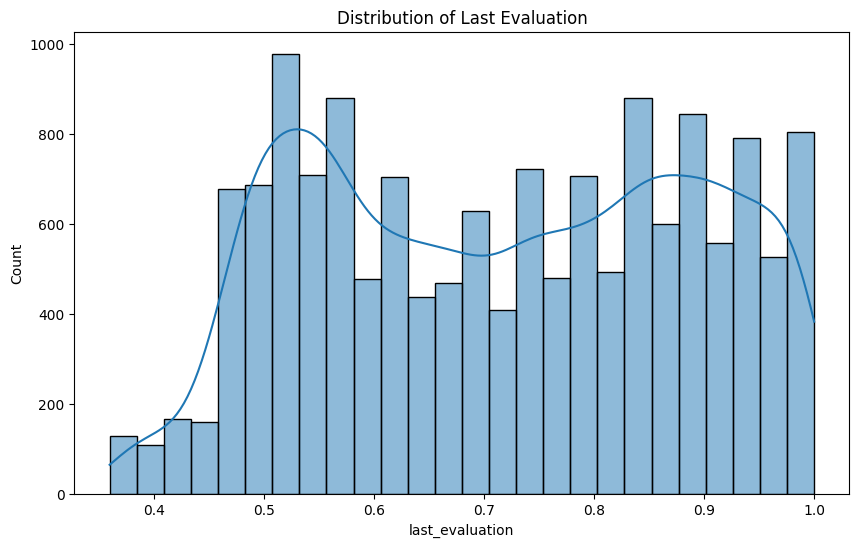


Correlation between satisfaction level and salary columns: -0.04741456626505596 0.03136695476614563
Correlation between left and salary columns: 0.13472197414242132 -0.06883296808670487
Correlation between left and low salary: 0.13472197414242132
Correlation between left with satisfaction level less than .5 and low salary: -0.04504129574203137


In [20]:
# plot last_evaluation
plt.figure(figsize=(10,6))
sns.histplot(df['last_evaluation'], kde=True)
plt.title('Distribution of Last Evaluation')
plt.show()
print()
# print correlation between satisfaction level and salary columns
print('Correlation between satisfaction level and salary columns:',df['satisfaction_level'].corr(df['salary_low']),df['satisfaction_level'].corr(df['salary_medium']))
# print correlation between left and salary columns
print('Correlation between left and salary columns:',df['left'].corr(df['salary_low']),df['left'].corr(df['salary_medium']))
# print correlation between left and low salary
print('Correlation between left and low salary:',df['left'].corr(df['salary_low']))
# print correlation between left with satisfaction level less than .5 and low salary
# Filter the DataFrame based on the conditions
filtered_df = df[(df['satisfaction_level'] < 0.5) & (df['salary_low'] == 1)]

# Compute the correlation between 'left' and 'satisfaction_level' or any other column
correlation = filtered_df['left'].corr(filtered_df['satisfaction_level'])

print('Correlation between left with satisfaction level less than .5 and low salary:', correlation)


## We'll do one-hot encoding for the department column 

In [21]:
# We'll implement one-hot encoding for 'department' column
df = pd.get_dummies(df, columns=['department'], drop_first=True,dtype='int64')
print(df.head())
print()
df.info()

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary_low  \
0                   3              0     1                      0           1   
1                   6              0     1                      0           0   
2                   4              0     1                      0           0   
3                   5              0     1                      0           1   
4                   3              0     1                      0           1   

   salary_medium  department_Ran

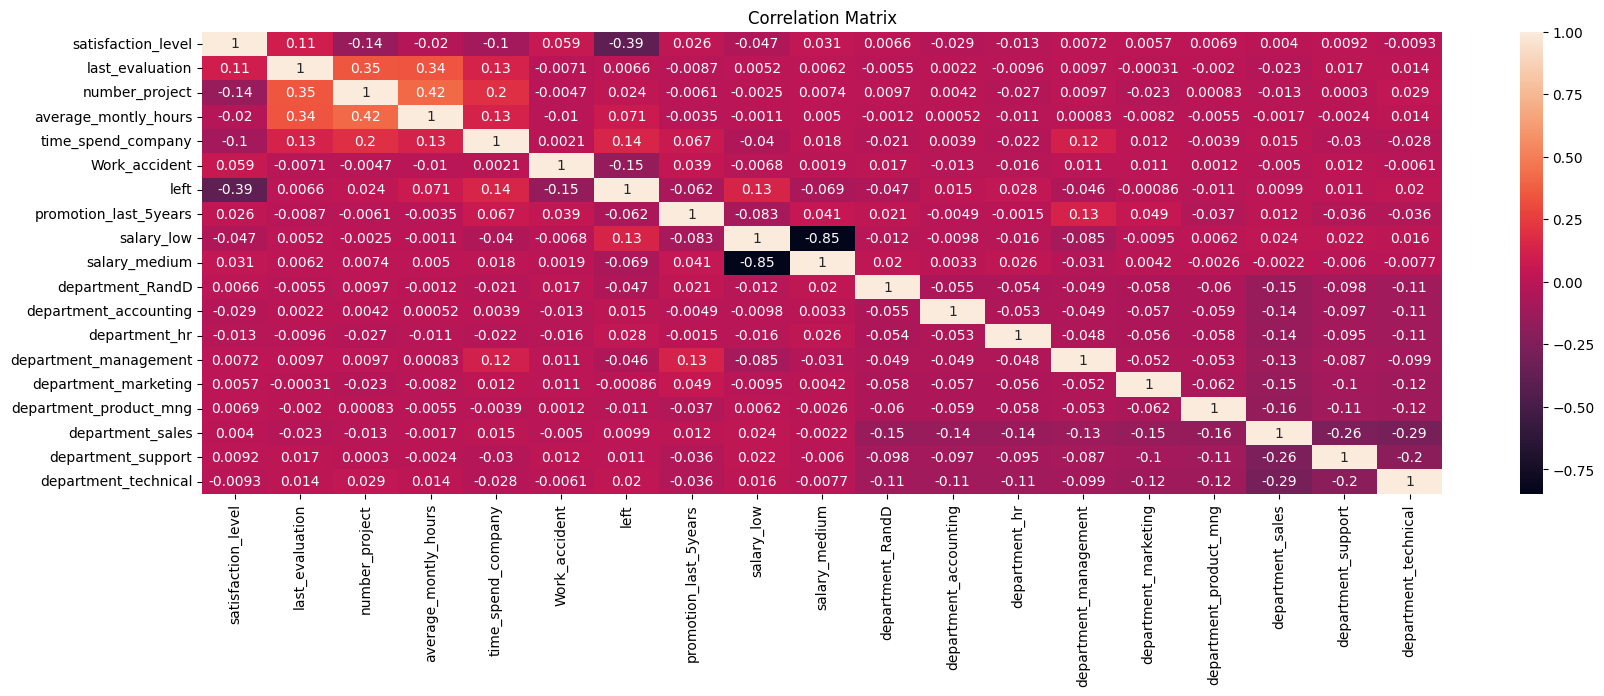

Number of employees who left by department:
department_RandD
0    3450
1     121
Name: count, dtype: int64
department_accounting
0    3367
1     204
Name: count, dtype: int64
department_hr
0    3356
1     215
Name: count, dtype: int64
department_management
0    3480
1      91
Name: count, dtype: int64
department_marketing
0    3368
1     203
Name: count, dtype: int64
department_product_mng
0    3373
1     198
Name: count, dtype: int64
department_sales
0    2557
1    1014
Name: count, dtype: int64
department_support
0    3016
1     555
Name: count, dtype: int64
department_technical
0    2874
1     697
Name: count, dtype: int64
Total number of employees who left: 3571


In [24]:
# Plot the correlation matrix for numerical columns
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

# Print counts of employees who left by encoded department
print('Number of employees who left by department:')
#print(df[df['left']==1]['department_IT'].value_counts())
print(df[df['left']==1]['department_RandD'].value_counts())
print(df[df['left']==1]['department_accounting'].value_counts())
print(df[df['left']==1]['department_hr'].value_counts())
print(df[df['left']==1]['department_management'].value_counts())
print(df[df['left']==1]['department_marketing'].value_counts())
print(df[df['left']==1]['department_product_mng'].value_counts())
print(df[df['left']==1]['department_sales'].value_counts())
print(df[df['left']==1]['department_support'].value_counts())
print(df[df['left']==1]['department_technical'].value_counts())
#print total number of employees who left
print('Total number of employees who left:',df[df['left']==1].shape[0])

        





In [23]:
print(df[df['left']==1].shape[0])

3571


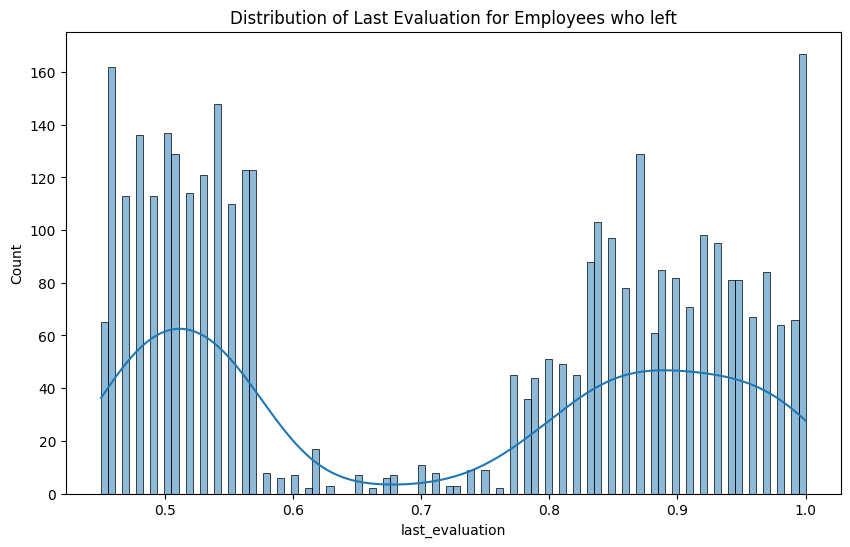

3571


In [45]:
# plot how many left company for each last_evaluation score
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==1]['last_evaluation'], kde=True, bins=100)
plt.title('Distribution of Last Evaluation for Employees who left')
plt.show()
# print how many employees left company in total
print(df['left'].sum())

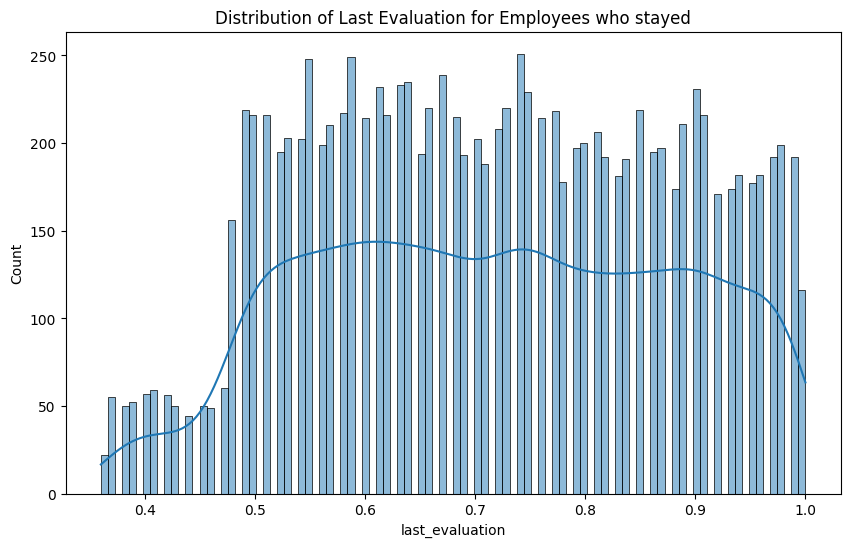

In [44]:
# Plot how many stayed for each last_evaluation score
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==0]['last_evaluation'], kde=True, bins=100)
plt.title('Distribution of Last Evaluation for Employees who stayed')
plt.show()


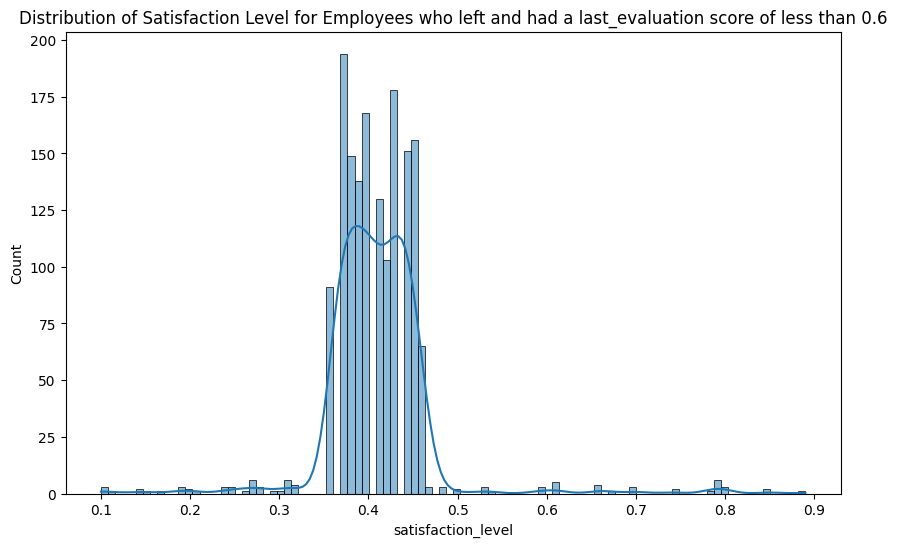

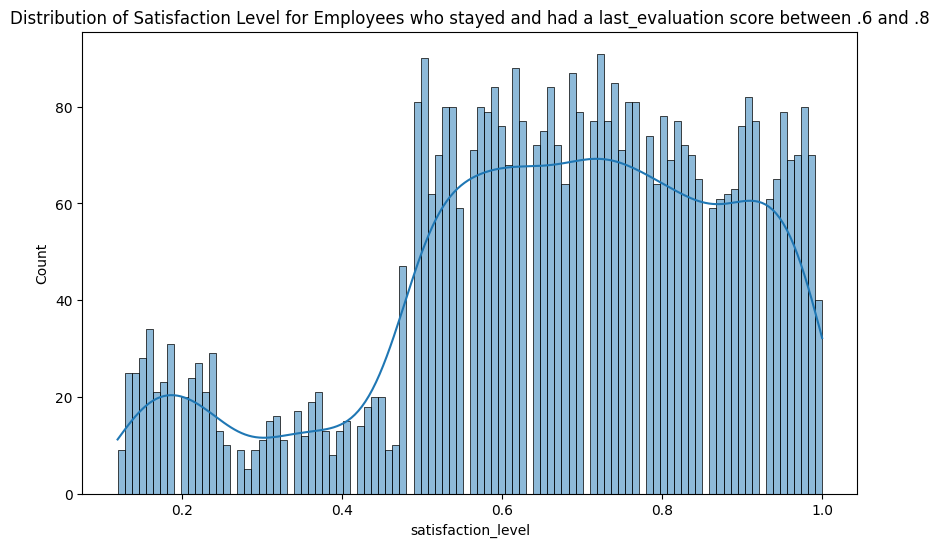

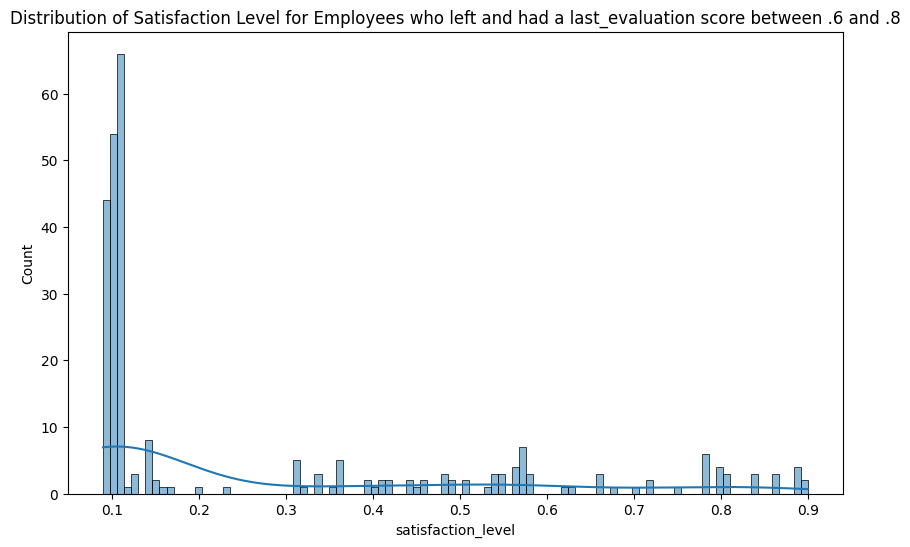

In [55]:
# Plot distribution of statifaction level for employees who left and had a last_evaluation score of less than 0.6
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['last_evaluation']<0.6)]['satisfaction_level'], kde=True, bins=100)
plt.title('Distribution of Satisfaction Level for Employees who left and had a last_evaluation score of less than 0.6')
plt.show()

# Plot distribution of statifaction level for employees who stayed and had a last_evaluation score between .6 and .8
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==0) & (df['last_evaluation']>=0.6) & (df['last_evaluation']<=0.8)]['satisfaction_level'], kde=True, bins=100)
plt.title('Distribution of Satisfaction Level for Employees who stayed and had a last_evaluation score between .6 and .8')
plt.show()

# Plot distribution of satisfaction level for employees who left and had a last_evaluation score between .6 and .8
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['last_evaluation']>=0.6) & (df['last_evaluation']<=0.8)]['satisfaction_level'], kde=True, bins=100)
plt.title('Distribution of Satisfaction Level for Employees who left and had a last_evaluation score between .6 and .8')
plt.show()



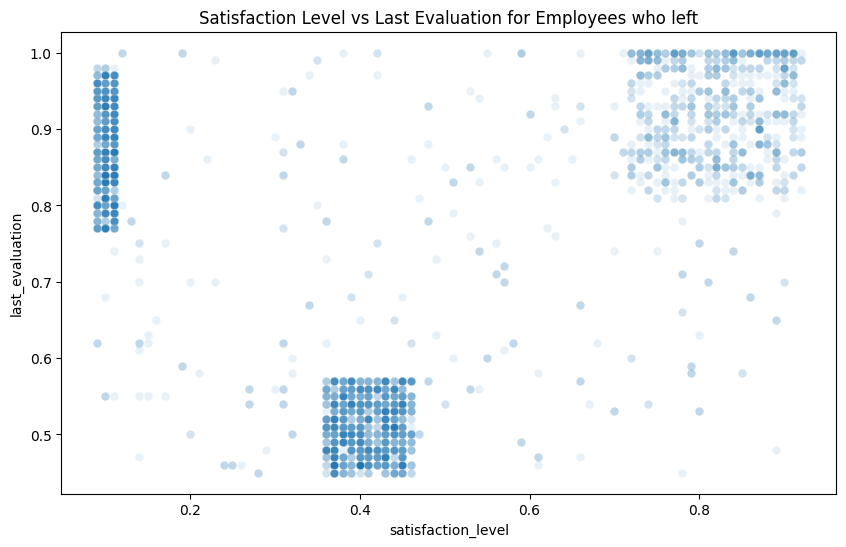

In [57]:
# Scatter plot of satisfaction_level and last_evaluation for those who left only
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df['left']==1], x='satisfaction_level', y='last_evaluation', alpha=0.1)
plt.title('Satisfaction Level vs Last Evaluation for Employees who left')
plt.show()


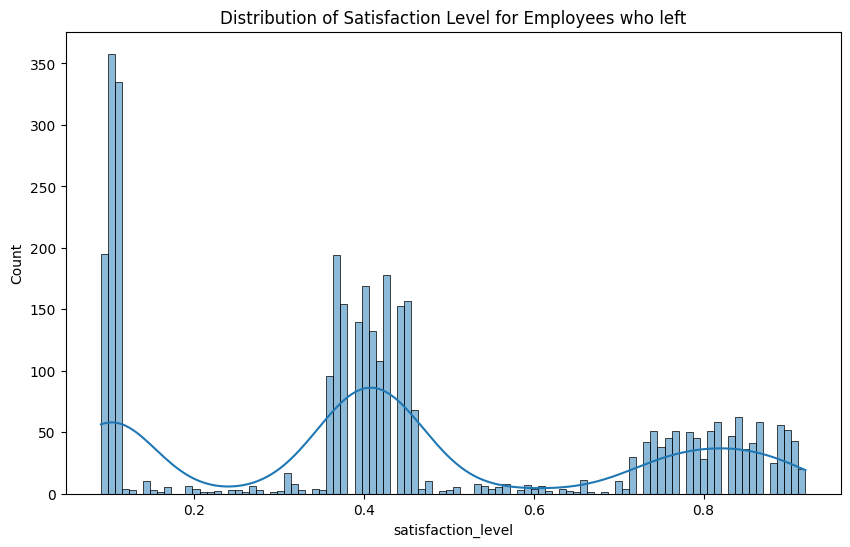

In [58]:
# plot distribution of the satisfaction level for employees who left
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==1]['satisfaction_level'], kde=True, bins=100)
plt.title('Distribution of Satisfaction Level for Employees who left')
plt.show()

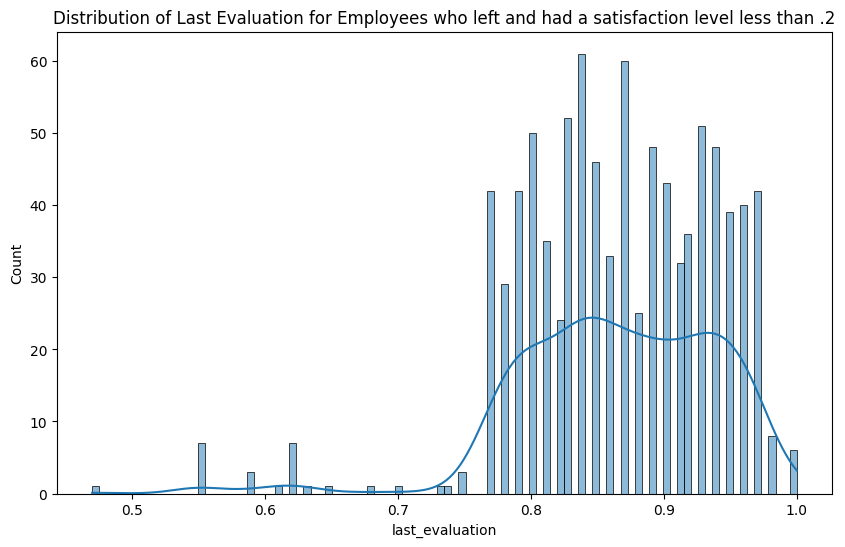

In [59]:
# Plot the distribution of the last_evaluation for employees who left and had a satisfaction level less than .2
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['satisfaction_level']<0.2)]['last_evaluation'], kde=True, bins=100)
plt.title('Distribution of Last Evaluation for Employees who left and had a satisfaction level less than .2')
plt.show()


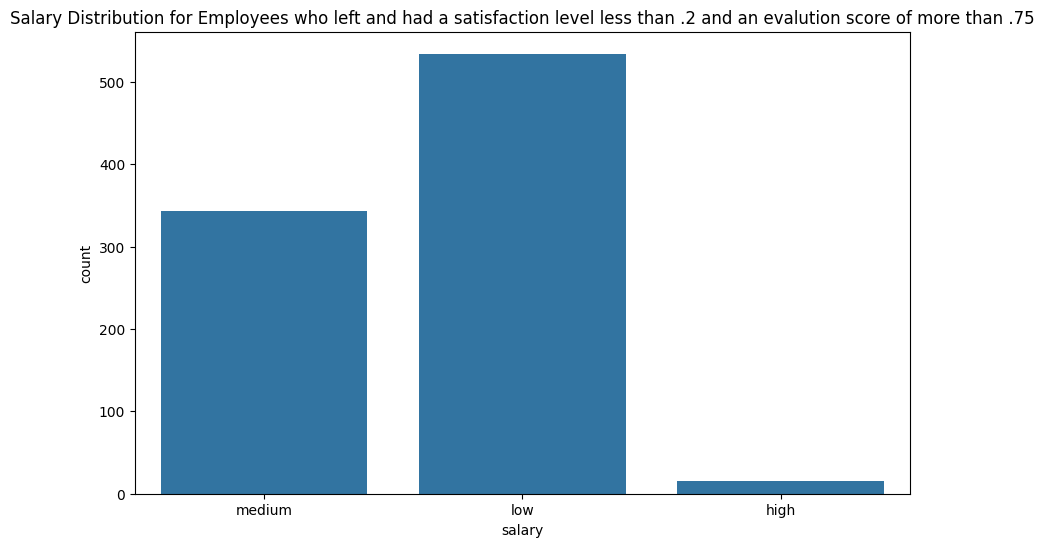

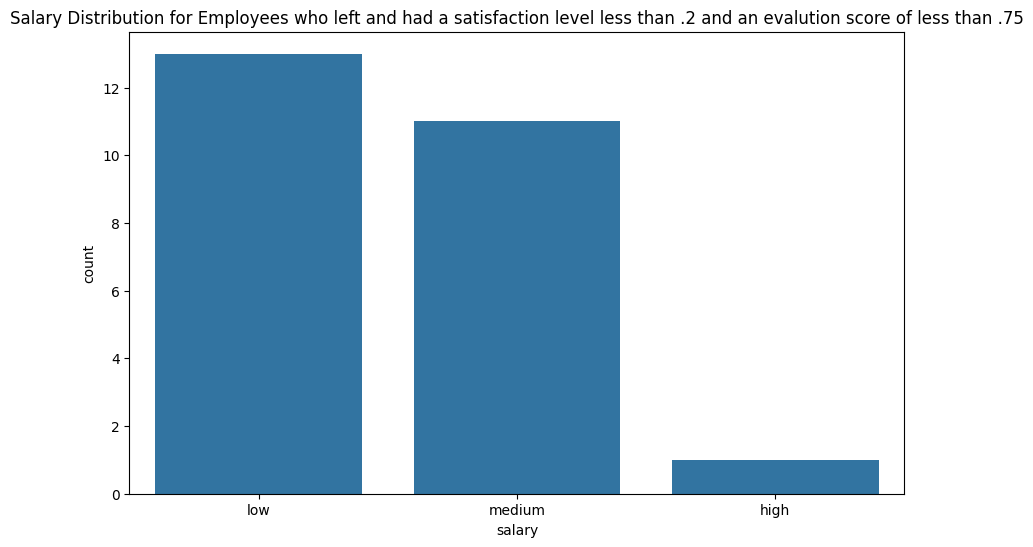

In [61]:
# Plot the salary distribution for employees who left and had a satisfaction level less than .2 and an evalution score of more than .75
plt.figure(figsize=(10,6))
sns.countplot(data=df[(df['left']==1) & (df['satisfaction_level']<0.2) & (df['last_evaluation']>0.75)], x='salary')
plt.title('Salary Distribution for Employees who left and had a satisfaction level less than .2 and an evalution score of more than .75')
plt.show()

# Then plot the salary distribution for employees who left and had a satisfaction level less then .2 and an evaluation score of less than .75
plt.figure(figsize=(10,6))
sns.countplot(data=df[(df['left']==1) & (df['satisfaction_level']<0.2) & (df['last_evaluation']<0.75)], x='salary')
plt.title('Salary Distribution for Employees who left and had a satisfaction level less than .2 and an evalution score of less than .75')
plt.show()
